In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}"')


Saving netflix_titles.csv to netflix_titles.csv
User uploaded file "netflix_titles.csv"


In [7]:
df = pd.read_csv('netflix_titles.csv')
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Not Specified", inplace=True)
df.dropna(subset=['date_added'], inplace=True)

/tmp/ipython-input-3206/76089897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("Unknown", inplace=True)
/tmp/ipython-input-3206/76089897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year

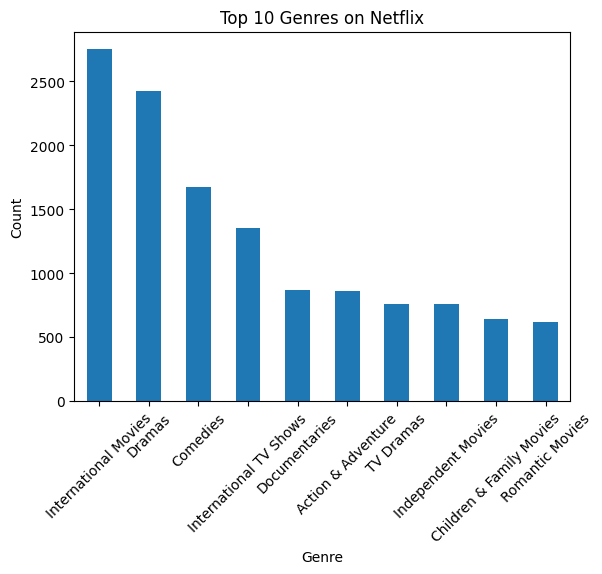

In [12]:
genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure()
top_genres.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

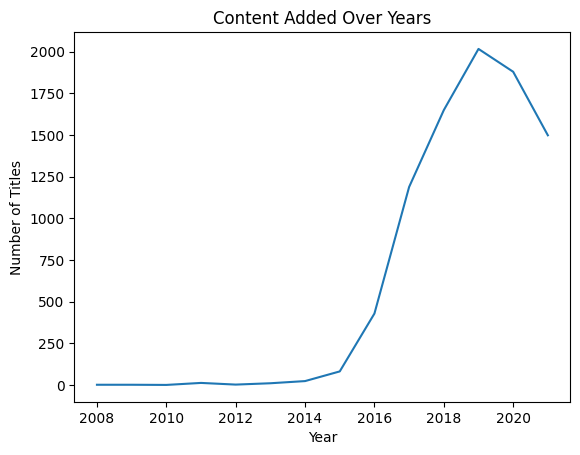

In [13]:
content_growth = df['year_added'].value_counts().sort_index()

plt.figure()
content_growth.plot(kind='line')
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

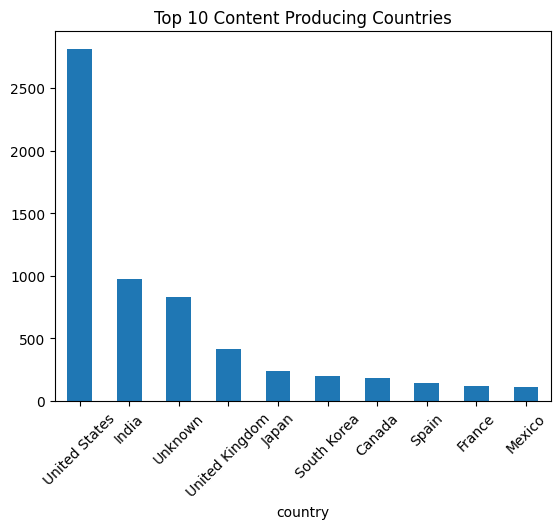

In [14]:
country_counts = df['country'].value_counts().head(10)

plt.figure()
country_counts.plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.xticks(rotation=45)
plt.show()

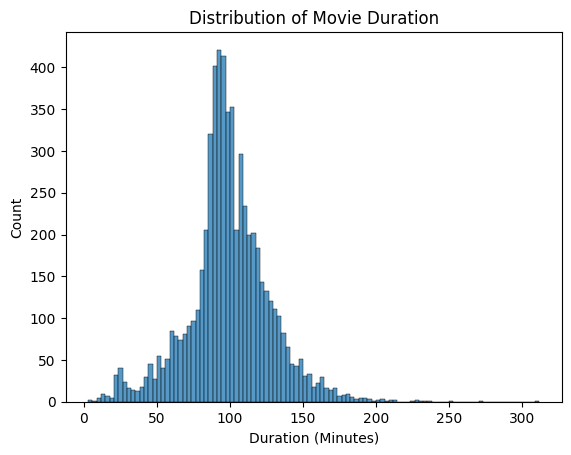

In [16]:
movies = df[df['type'] == "Movie"].copy()

movies['duration'] = movies['duration'].str.replace(" min", "")
movies.dropna(subset=['duration'], inplace=True) # Drop rows with NaN in duration
movies['duration'] = movies['duration'].astype(int)

plt.figure()
sns.histplot(movies['duration'])
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.show()

In [17]:
print("Conclusion:")
print("Netflix significantly expanded after 2016.")
print("Drama and International content dominate.")
print("US is the largest contributor of content.")
print("Most movies fall in standard 90–120 min duration.")

Conclusion:
Netflix significantly expanded after 2016.
Drama and International content dominate.
US is the largest contributor of content.
Most movies fall in standard 90–120 min duration.


In [18]:
print ("Netflix Data Analysis Using Python by BHUMI JAIN ")

Netflix Data Analysis Using Python by BHUMI JAIN 
